<a href="https://colab.research.google.com/github/GraceCiambrone/Brain_Tumor_Classification/blob/main/Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving brain-tumor.zip to brain-tumor.zip


In [2]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "brain-tumor.zip" with length 91002358 bytes


In [3]:
import os
import zipfile

local_zip = '/content/brain-tumor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
import os

glioma_dir = os.path.join('/tmp/Training/glioma_tumor')
meningioma_dir = os.path.join('/tmp/Training/meningioma_tumor')
pituitary_dir = os.path.join('/tmp/Training/pituitary_tumor')
no_tumor_dir = os.path.join('/tmp/Training/no_tumor')

In [5]:
type(glioma_dir)

str

In [6]:
glioma_dir

'/tmp/Training/glioma_tumor'

In [7]:
glioma_files = os.listdir(glioma_dir)
meningioma_files = os.listdir(meningioma_dir)
pituitary_files = os.listdir(pituitary_dir)
no_tumor_files = os.listdir(no_tumor_dir)

In [16]:
# Roughly same amount of data for each class
len(glioma_files)
len(meningioma_files)
len(pituitary_files)
len(no_tumor_files)

395

In [8]:
print(glioma_files[:10])
print(meningioma_files[:10])
print(pituitary_files[:10])
print(no_tumor_files[:10])

['gg (721).jpg', 'gg (74).jpg', 'gg (716).jpg', 'gg (422).jpg', 'gg (186).jpg', 'gg (31).jpg', 'gg (367).jpg', 'gg (736).jpg', 'gg (57).jpg', 'gg (33).jpg']
['m3 (131).jpg', 'm1(110).jpg', 'm2 (109).jpg', 'm (161).jpg', 'm3 (106).jpg', 'm3 (218).jpg', 'm (15).jpg', 'm2 (95).jpg', 'm (89).jpg', 'm1(120).jpg']
['p (593).jpg', 'p (525).jpg', 'p (173).jpg', 'p (482).jpg', 'p (747).jpg', 'p (449).jpg', 'p (345).jpg', 'p (565).jpg', 'p (650).jpg', 'p (35).jpg']
['image(9).jpg', 'image(80).jpg', 'image(327).jpg', 'image(137).jpg', 'image(150).jpg', 'image(289).jpg', 'image(180).jpg', 'image (19).jpg', 'image(169).jpg', 'image(31).jpg']


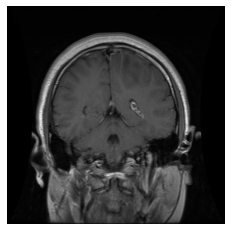

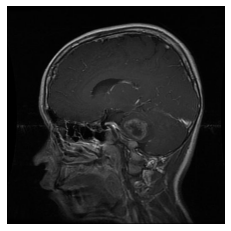

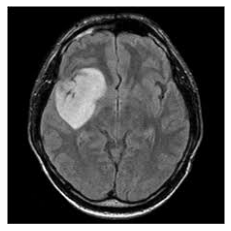

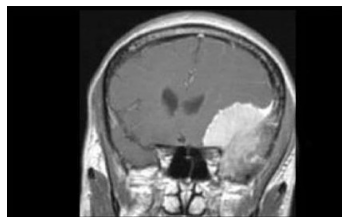

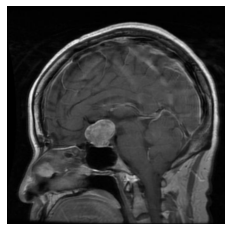

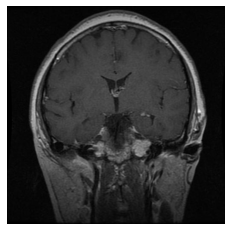

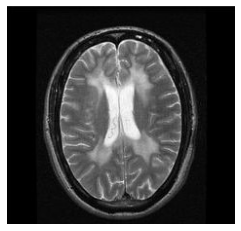

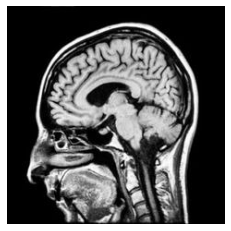

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_glioma = [os.path.join(glioma_dir, fname) 
                for fname in glioma_files[pic_index-2:pic_index]]
next_meningioma = [os.path.join(meningioma_dir, fname) 
                for fname in meningioma_files[pic_index-2:pic_index]]
next_pituitary = [os.path.join(pituitary_dir, fname) 
                for fname in pituitary_files[pic_index-2:pic_index]]
next_no_tumor = [os.path.join(no_tumor_dir, fname) 
                for fname in no_tumor_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_glioma+next_meningioma+next_pituitary+next_no_tumor):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [10]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/Training/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.1,
      #horizontal_flip=True,
      #fill_mode='nearest'
      )

VALIDATION_DIR = "/tmp/Testing/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [13]:
model.compile(loss ='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
history = model.fit(train_generator, epochs=13, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/13
20/20 [==============================] - 174s 9s/step - loss: 1.6406 - accuracy: 0.3359 - val_loss: 2.6326 - val_accuracy: 0.2169
Epoch 2/13
20/20 [==============================] - 170s 8s/step - loss: 1.0654 - accuracy: 0.5123 - val_loss: 1.5754 - val_accuracy: 0.2302
Epoch 3/13
20/20 [==============================] - 169s 8s/step - loss: 0.9182 - accuracy: 0.6014 - val_loss: 2.3019 - val_accuracy: 0.3016
Epoch 4/13
20/20 [==============================] - 169s 9s/step - loss: 0.8827 - accuracy: 0.6339 - val_loss: 1.7339 - val_accuracy: 0.3651
Epoch 5/13
20/20 [==============================] - 169s 8s/step - loss: 0.6697 - accuracy: 0.7200 - val_loss: 1.9610 - val_accuracy: 0.4339
Epoch 6/13
20/20 [==============================] - 169s 8s/step - loss: 0.6474 - accuracy: 0.7076 - val_loss: 1.8969 - val_accuracy: 0.5000
Epoch 7/13
20/20 [==============================] - 169s 8s/step - loss: 0.5299 - accuracy: 0.7747 - val_loss: 1.5453 - val_accuracy: 0.5503
Epoch 8/13
20

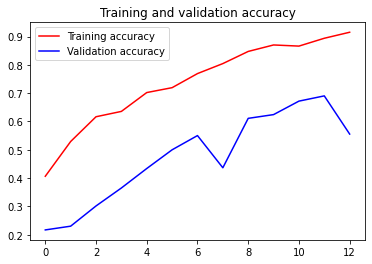

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:

# TODO
# Precision and recall for each classification
